In [0]:
!pip install sqlalchemy
!pip install psycopg2
!pip install psycopg2-binary

In [0]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

import matplotlib.pyplot as plt

# import warnings
warnings.filterwarnings('ignore')

In [0]:
!pip install seaborn==0.9.0
import seaborn as sns 
sns.set()

In [0]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [0]:
# 1. Determine all the variable types and find the fraction of the missing values for each variable.

In [0]:
useduc=pd.read_sql_query('select * from useducation', con=engine)


engine.dispose()

In [0]:
useduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [0]:
useduc.isnull().sum()*100/useduc.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [0]:
useduc.nunique()

PRIMARY_KEY                     1487
STATE                             80
YEAR                              26
ENROLL                          1224
TOTAL_REVENUE                   1274
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1251
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1222
CAPITAL_OUTLAY_EXPENDITURE      1275
GRADES_PK_G                     1261
GRADES_KG_G                     1348
GRADES_4_G                      1340
GRADES_8_G                      1347
GRADES_12_G                     1342
GRADES_1_8_G                    1360
GRADES_9_12_G                   1358
GRADES_ALL_G                    1318
AVG_MATH_4_SCORE                 535
AVG_MATH_8_SCORE                 531
AVG_READING_4_SCORE              532
AVG_READING_8_SCORE              497
dtype: int64

In [0]:


                          
my_list=["ENROLL",                          
"TOTAL_REVENUE",                   
"FEDERAL_REVENUE",                 
"STATE_REVENUE",                   
"LOCAL_REVENUE",                   
"TOTAL_EXPENDITURE",               
"INSTRUCTION_EXPENDITURE",         
"SUPPORT_SERVICES_EXPENDITURE",    
"OTHER_EXPENDITURE",               
"CAPITAL_OUTLAY_EXPENDITURE",      
"GRADES_PK_G",                     
"GRADES_KG_G",                     
"GRADES_4_G",                      
"GRADES_8_G",                      
"GRADES_12_G",                     
"GRADES_1_8_G",                    
"GRADES_9_12_G",                   
"GRADES_ALL_G"]                    
             

In [0]:


states=useduc["STATE"].unique()

for state in states:
  useduc.loc[useduc['STATE']==state, my_list]=useduc.loc[useduc["STATE"]==state, my_list].interpolate()
#drop nulls
useduc.dropna(inplace=True)

In [0]:
useduc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 209 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     466 non-null object
STATE                           466 non-null object
YEAR                            466 non-null int64
ENROLL                          466 non-null float64
TOTAL_REVENUE                   466 non-null float64
FEDERAL_REVENUE                 466 non-null float64
STATE_REVENUE                   466 non-null float64
LOCAL_REVENUE                   466 non-null float64
TOTAL_EXPENDITURE               466 non-null float64
INSTRUCTION_EXPENDITURE         466 non-null float64
SUPPORT_SERVICES_EXPENDITURE    466 non-null float64
OTHER_EXPENDITURE               466 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      466 non-null float64
GRADES_PK_G                     466 non-null float64
GRADES_KG_G                     466 non-null float64
GRADES_4_G                      466 non-null float64
GRADES_8_G                      466 non-null flo

In [0]:
useduc.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0,9633.0,60949.0,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,1193260.0,220650.0,877190.0,4495.0,64613.0,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,636106.0,127007.0,203555.0,1980.0,36442.0,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0,73233.0,469965.0,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,1127563.0,143767.0,588209.0,12520.0,50707.0,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


In [0]:
#1.Derive the descriptive statistics of the data and discuss the points you find remarkable.
useduc.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,1.038843e+06,22874.634120,72083.415236,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,1.482245e+06,34605.068547,87006.137056,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,1.545200e+04,91.000000,4528.000000,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,2.443388e+05,3753.000000,20988.000000,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,6.059525e+05,13068.500000,51156.500000,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,1.046753e+06,28808.500000,79618.000000,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,249524.000000,530531.000000,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


In [0]:
# Mean expenditure  greater than mean revenue
#Instruction expenditure almost half of total expenditure


In [0]:
#2.Choose a state (e.g. California) and draw a line graph 
#of its total revenues and total expenditures along the years. How do these 2 variables evolve 
#during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

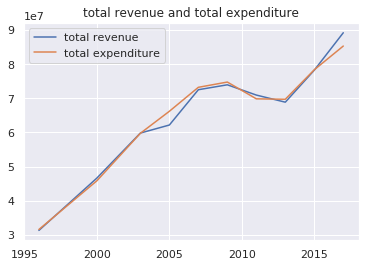

In [0]:
plt.plot(useduc.loc[useduc.STATE == "CALIFORNIA", "YEAR"],
         useduc.loc[useduc.STATE == "CALIFORNIA", "TOTAL_REVENUE"], label="total revenue")

plt.plot(useduc.loc[useduc.STATE == "CALIFORNIA", "YEAR"],
         useduc.loc[useduc.STATE == "CALIFORNIA", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

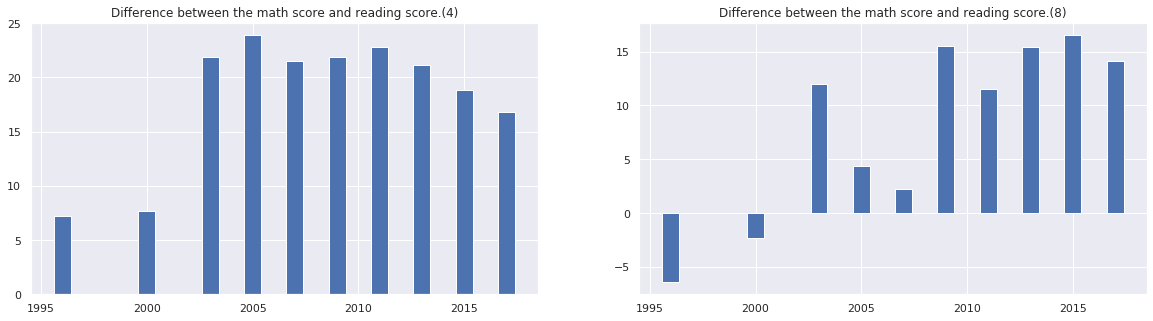

Difference between math and reading scores (4)
213      7.216492
420      7.648537
576     21.822545
680     23.854931
784     21.511905
891     21.912522
997     22.806357
1101    21.108497
1203    18.871396
1451    16.841127
dtype: float64
difference between math and reading scores (8)
213     -6.424972
420     -2.323040
576     11.976121
680      4.373619
784      2.222356
891     15.553342
997     11.484551
1101    15.453063
1203    16.556305
1451    14.117570
dtype: float64


In [0]:
#3.In your chosen state, which of the lessons are the students more successful, math or reading?
plt.figure(figsize=(20,5))
#x axis first then y axis
plt.subplot(1,2,1)
plt.bar(useduc.loc[useduc.STATE == "CALIFORNIA", "YEAR"],
         useduc.loc[useduc.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"] - useduc.loc[useduc.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"])
plt.title("Difference between the math score and reading score.(4)")

plt.subplot(1,2,2)
plt.bar(useduc.loc[useduc.STATE == "CALIFORNIA", "YEAR"],
         useduc.loc[useduc.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"] - useduc.loc[useduc.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"])
plt.title("Difference between the math score and reading score.(8)")
plt.show()

print("Difference between math and reading scores (4)")
print(useduc.loc[useduc.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"] - useduc.loc[useduc.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"])
print("difference between math and reading scores (8)")
print(useduc.loc[useduc.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"] - useduc.loc[useduc.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"])

In [0]:
#Generally math score is greater than reading score

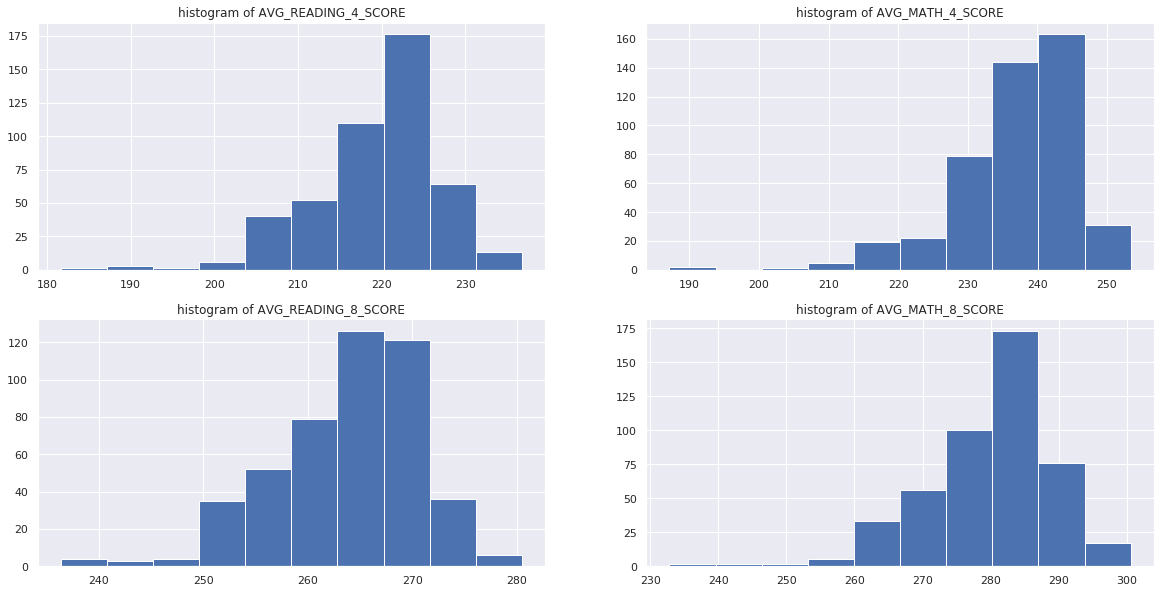

In [0]:
#4.What are the distributions of the math and reading scores in the sample?
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(useduc.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(useduc.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(useduc.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(useduc.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))

plt.show()

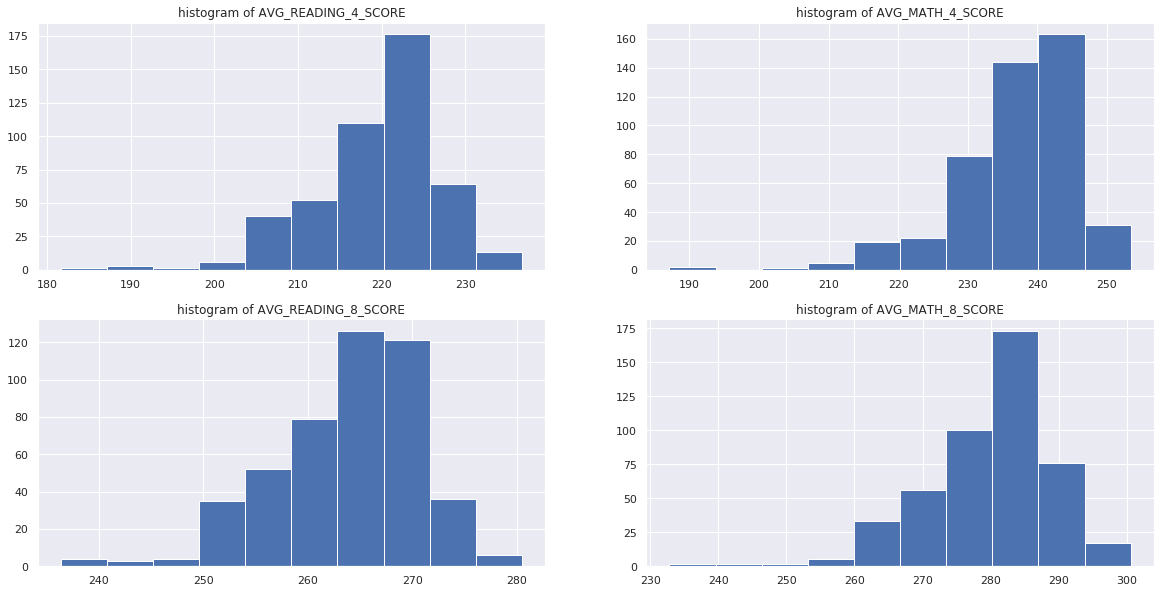

In [0]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(useduc.AVG_READING_4_SCORE)
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(useduc.AVG_MATH_4_SCORE)
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(useduc.AVG_READING_8_SCORE)
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(useduc.AVG_MATH_8_SCORE)
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))

plt.show()

In [0]:
#5.Notice there are too many missing values for math and reading scores.
# Fill out the missing values using mean, median, and linear interpolation. 
#Then compare the effects of these techniques on the distributions of the score variables.
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

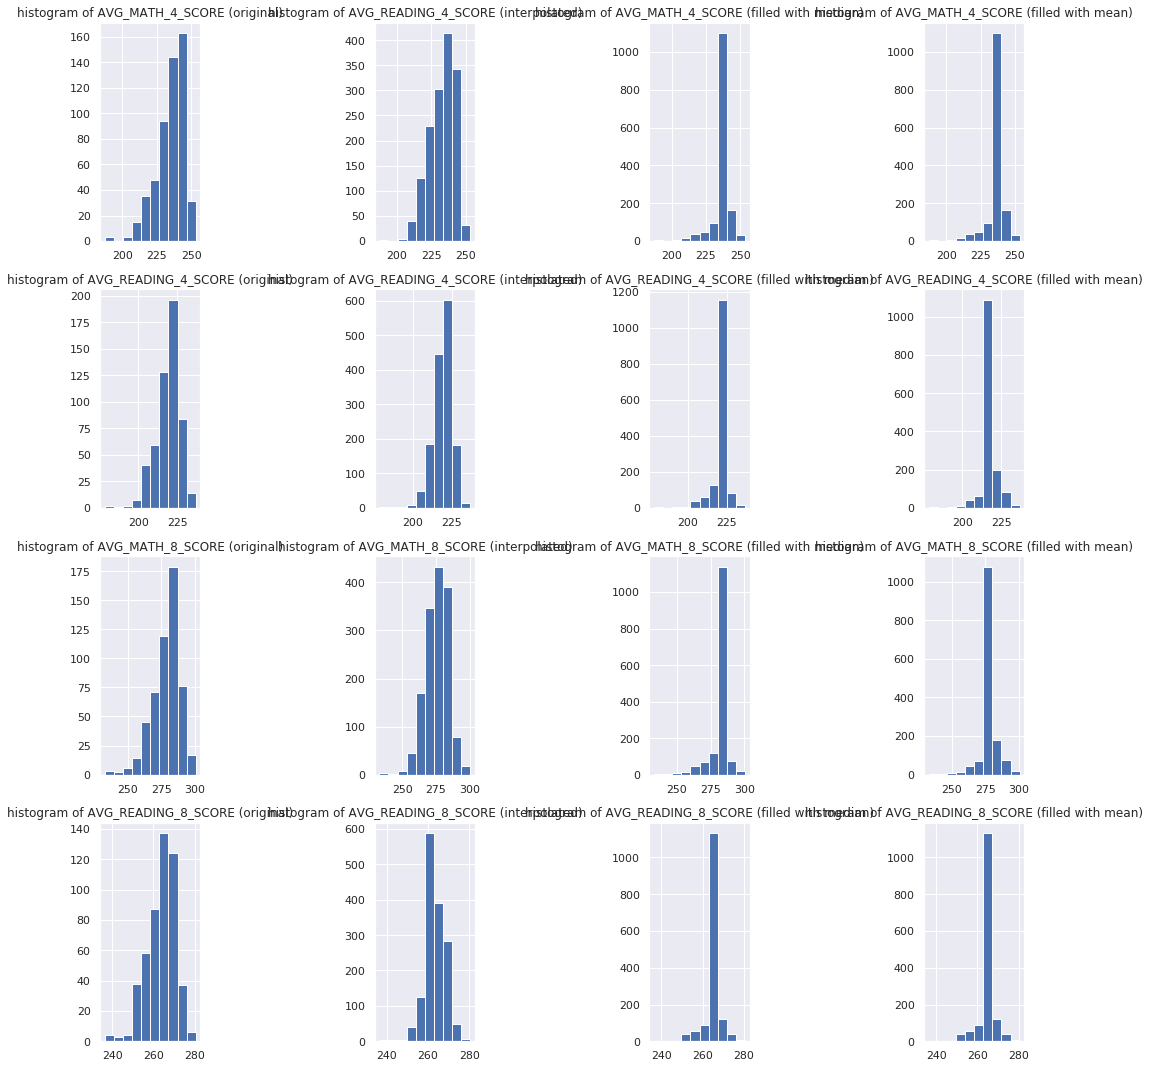

In [0]:
plt.figure(figsize=(15,15))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()

In [0]:
# We would rather use interpolation because the other methods have a stronger effect on the results. 